In [17]:
# Use the Biopython Entrez module to search National Center for Biotechnology Information (NCBI) 
# for target sequences. In this case, we want to download all of the sequences from a 
# particular study (Pester et al. 2014, Environmental Microbiology 16: 3055–3071), 
# because this study published near full-length nitrite oxidase subunit B (NxrB) DNA sequences 
# from a diverse group of 85 Nitrospira cultures and environmental Nitrospira clones.

# Enter your email information for NCBI
from Bio import Entrez
Entrez.email = "brookeweigel@uchicago.edu"

# Search accession numbers KC884854 to KC884938 (from Pester et al. 2014)
# Note - use retmax to access more sequences, otherwise the default is set at 20 sequences.
handle = Entrez.esearch(db = "nuccore", retmax = "100", term = "KC884854:KC884938[ACCN]")

record = Entrez.read(handle)
handle.close()

In [18]:
# Check the length of the list of sequences IDs to confirm that we collected 85 sequences.
id_list = record["IdList"]
len(id_list)

85

In [2]:
# Use the efetch module to write the results of the search into a FASTA file.
Entrez.email = "brookeweigel@uchicago.edu"
handle = Entrez.efetch(db = "nuccore",
                       rettype = "fasta",
                       retmode = "text",
                       id = id_list)
out_handle = open("NxrB_DNA.fasta", "w")
for line in handle:
    out_handle.write(line)
out_handle.close()
handle.close()

In [3]:
%%sh

# Shell magic! The code above connects with the terminal. Using terminal, add your reference 
# sequence to the BLAST results, and combine into one FASTA file. 
# This code adds File1 >> to File2.

cat Great_Lakes_Nitrospirae_Contig_120_59.fasta >> NxrB_DNA.fasta

In [4]:
# Use regular expressions to get rid of spaces in the FASTA file sequence names. 
# First, get rid of "Uncultured and Candidatus"

import re
with open("NxrB_DNA.fasta", 'r') as infile, open("NxrB_DNA.good.fasta", 'w') as outfile:
    for line in infile:
        if line.startswith('>'):
            regex = re.compile(r"\s(Uncultured)\s|\s(Candidatus)\s")
        outfile.write(regex.sub("_", line))

In [5]:
# Use regular expressions to get rid of spaces in the FASTA file sequence names. 
# Next, get rid of spaces between Accession number and "Nitrospira"

with open("nxrB_DNA.good.fasta", 'r') as infile, open("nxrB_DNA.good2.fasta", 'w') as outfile:
    for line in infile:
        if line.startswith('>'):
            regex2 = re.compile(r"\s(Nitro)")
        outfile.write(regex2.sub("_Nitro", line))

In [6]:
# Use regular expressions to get rid of spaces in the FASTA file sequence names. 
# Get rid of spaces between "Nitrospira" and species name

with open("nxrB_DNA.good2.fasta", 'r') as infile, open("nxrB_DNA.good3.fasta", 'w') as outfile:
    for line in infile:
        if line.startswith('>'):
            regex3 = re.compile(r"(spira)\s")
        outfile.write(regex3.sub("spira_", line))

In [7]:
# Use regular expressions to get rid of spaces in the FASTA file sequence names. 
# Finally, get rid of spaces between Nitrospira_sp. and the clone number.

with open("nxrB_DNA.good3.fasta", 'r') as infile, open("nxrB_DNA.good4.fasta", 'w') as outfile:
    for line in infile:
        if line.startswith('>'):
            regex3 = re.compile(r"(sp.)\s(clone)\s")
        outfile.write(regex3.sub("sp._clone_", line))

In [8]:
# Check to make sure that the FASTA file has the correct record ids
# to create a clean looking phylogeny

import collections
from Bio import SeqIO

infile = "nxrB_DNA.good4.fasta"

for record in SeqIO.parse(open(infile), "fasta"):
    print(record.id)

KC884914.1_Nitrospira_sp._clone_sponge-26
KC884913.1_Nitrospira_sp._clone_sponge-25
KC884912.1_Nitrospira_sp._clone_sponge-19
KC884911.1_Nitrospira_sp._clone_sponge-4
KC884936.1_Nitrospira_sp._clone_Namibia-36
KC884935.1_Nitrospira_sp._clone_Namibia-34
KC884934.1_Nitrospira_sp._clone_Namibia-32
KC884933.1_Nitrospira_sp._clone_Namibia-30
KC884932.1_Nitrospira_sp._clone_Namibia-27
KC884931.1_Nitrospira_sp._clone_Namibia-26
KC884930.1_Nitrospira_sp._clone_Namibia-25
KC884929.1_Nitrospira_sp._clone_Namibia-24
KC884928.1_Nitrospira_sp._clone_Namibia-21
KC884927.1_Nitrospira_sp._clone_Namibia-20
KC884926.1_Nitrospira_sp._clone_Namibia-19
KC884925.1_Nitrospira_sp._clone_Namibia-17
KC884924.1_Nitrospira_sp._clone_Namibia-15
KC884923.1_Nitrospira_sp._clone_Namibia-14
KC884922.1_Nitrospira_sp._clone_Namibia-13
KC884921.1_Nitrospira_sp._clone_Namibia-12
KC884920.1_Nitrospira_sp._clone_Namibia-11
KC884919.1_Nitrospira_sp._clone_Namibia-7
KC884918.1_Nitrospira_sp._clone_Namibia-6
KC884917.1_Nitrosp

In [9]:
# Align the sequences with a command line wrapper for the multiple alignment program MAFFT,
# and output the alignment as a FASTA file.

from Bio.Align.Applications import MafftCommandline

mafft_exe = "/usr/local/bin/mafft"

input_sequences = "nxrB_DNA.good4.fasta"
output_alignment = "nxrB_DNA.aligned.fasta"

mafft_cline = MafftCommandline(mafft_exe, input=input_sequences)
print(mafft_cline)

/usr/local/bin/mafft nxrB_DNA.good4.fasta


In [10]:
# Because MAFFT writes the alignment to stdout, this code will save it to a file 
# and then parse it into a FASTA output.

from Bio import AlignIO
from Bio import SeqIO

stdout, stderr = mafft_cline()
with open("nxrB_DNA.aligned.fasta", "w") as handle:
    handle.write(stdout)
align = AlignIO.read("nxrB_DNA.aligned.fasta", "fasta")

In [11]:
# Convert the fasta alignment into a phylip alignment (better input for raxml to build the tree).

from Bio import AlignIO  

AlignIO.convert("nxrB_DNA.aligned.fasta", "fasta", 
                "nxrB_DNA.aligned.phy", "phylip-relaxed")

1

In [12]:
# Construct a Maximum Likelihood phylogenetic tree using the RAxML
# (Randomized Axelerated Maximum Likelihood) command line wrapper.

from Bio.Phylo.Applications import RaxmlCommandline 

raxml_exe = "/usr/bin/raxml"

# Required parameters are sequences, model, and output file name. 
# The parameter parsimony_seed must also be set for RAxML.
# Note that if you do not specify parsimony_seed, 
# this wrapper will set the seed to 10000 for you.
# To assess node support, add rapid_bootstrap_seed.
# Adding -f = "a" tells RAxML to conduct a rapid Bootstrap analysis 
# and search for the best-scoring Maximum Likelihood tree.
# Note: for protein sequences, use model = PROTGAMMAAUTO

raxml_cline = RaxmlCommandline(raxml_exe, 
                               sequences = "nxrB_DNA.aligned.phy",
                               model = "GTRGAMMA",
                               name = "raxml_nxrB_DNA.out",
                               algorithm = "a",
                               parsimony_seed = 12345, 
                               rapid_bootstrap_seed = 12345,
                               num_replicates=100,
                               threads = "2") 
print(raxml_cline)

/usr/bin/raxml -f a -m GTRGAMMA -n raxml_nxrB_DNA.out -p 12345 -s nxrB_DNA.aligned.phy -T 2 -x 12345 -N 100


In [13]:
# Because raxml writes the output to stdout, this code will parse the output

from Bio import AlignIO
from Bio import SeqIO

try: 
    stdout, stderr = raxml_cline()
    
# If this code fails, it might be because the files already exist 
# and it can't re-write over the raxml files. If you are running
# raxml a second time, delete the old raxml output files to
# avoid this error message.
except:
    print("Application Error: the files already exist, can't re-write")

In [3]:
# Import the raxml "Best tree" and visualize the preliminary phylogeny using the Bio.Phylo module

from Bio import Phylo

tree = Phylo.read("RAxML_bestTree.raxml_nxrB_DNA.out", "newick")
Phylo.draw_ascii(tree)

               , KC884896.1_Nitrospira_sp.
              _|
             | | KC884897.1_Nitrospira_sp.
             |
          ___| , KC884898.1_Nitrospira_marina
         |   | |
         |   | | KC884902.1_Nitrospira_marina
         |   | |
         |   |_| KC884903.1_Nitrospira_marina
         |     |
         |     , KC884899.1_Nitrospira_marina
         |     |
         |     , KC884901.1_Nitrospira_marina
         |     |
         |     | KC884900.1_Nitrospira_marina
         |
         |        , KC884861.1_Nitrospira_bockiana
         |       _|
         |      | |, KC884859.1_Nitrospira_bockiana
         |      | ||
         |      |  | KC884860.1_Nitrospira_bockiana
         |      |
         |      |      , KC884858.1_Nitrospira_moscoviensis
         |      |     ,|
         |      |     || KC884857.1_Nitrospira_moscoviensis
         |      |     |
         |      |     |, KC884856.1_Nitrospira_moscoviensis
         |      |    _||
         |      |   | || KC884854.1_Nitros

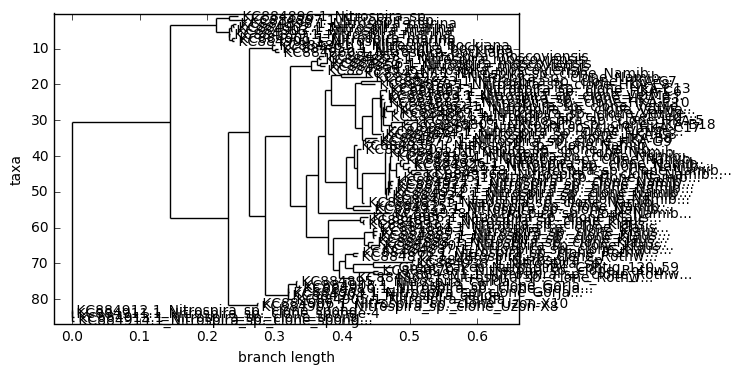

In [5]:
# If you have matplotlib or pylab installed, you can create a graphic using the draw function. 
# Next, we will output the tree to R and create a much nicer looking phylogeny.

tree = Phylo.read("RAxML_bestTree.raxml_nxrB_DNA.out", "newick")
tree.rooted = False
Phylo.draw(tree)